In [1]:
import pandas as pd
import os
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load Data

In [2]:
def load(data_dir: str) -> pd.DataFrame:
    sales_df = pd.read_csv(os.path.join(data_dir, "sales_train.csv"))
    items_df = pd.read_csv(os.path.join(data_dir, "items.csv"))
    item_categories = pd.read_csv(os.path.join(data_dir, "item_categories.csv"))
    shops_df = pd.read_csv(os.path.join(data_dir, "shops.csv"))
    
    sales_df = sales_df.merge(items_df, how="left", on="item_id")
    sales_df = sales_df.merge(item_categories, how="left", on="item_category_id")
    sales_df = sales_df.merge(shops_df, how="left", on="shop_id")
    
    return sales_df

In [3]:
df = load(data_dir="../data")

In [4]:
df.head(n=10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""


In [5]:
df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2935844,10.10.2015,33,25,7409,299.0,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935845,09.10.2015,33,25,7460,299.0,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935846,14.10.2015,33,25,7459,349.0,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
2935847,22.10.2015,33,25,7440,299.0,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3,"Москва ТРК ""Атриум"""
2935848,03.10.2015,33,25,7460,299.0,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [7]:
df.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


# Clean

### Look for NaN Values

In [8]:
df.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

### Casting

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      int64  
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
dtypes: float64(2), int64(4), object(4)
memory usage: 246.4+ MB


In [10]:
df.head(n=1)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


In [11]:
def _cast_values(df: pd.DataFrame) -> pd.DataFrame:
    df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
    df["date_block_num"] = df["date_block_num"].astype("int8")
    df["shop_id"] = df["shop_id"].astype("int8")
    df["item_id"] = df["item_id"].astype("int16")
    df["item_price"] = df["item_price"].astype("float64")
    df["item_cnt_day"] = df["item_cnt_day"].astype("float32")
    df["item_category_id"] = df["date_block_num"].astype("int8")
    
    return df

In [12]:
df = _cast_values(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935849 entries, 0 to 2935848
Data columns (total 10 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      int8          
 2   shop_id             int8          
 3   item_id             int16         
 4   item_price          float64       
 5   item_cnt_day        float32       
 6   item_name           object        
 7   item_category_id    int8          
 8   item_category_name  object        
 9   shop_name           object        
dtypes: datetime64[ns](1), float32(1), float64(1), int16(1), int8(3), object(3)
memory usage: 159.6+ MB


### Remove Outliers

<AxesSubplot:>

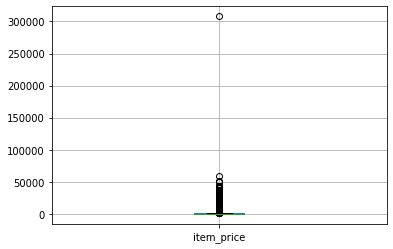

In [14]:
df[["item_price"]].boxplot()

<AxesSubplot:>

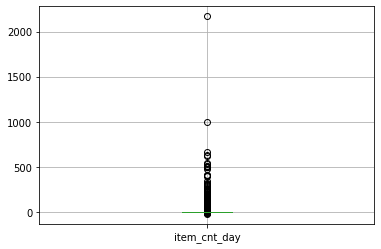

In [15]:
df[["item_cnt_day"]].boxplot()

In [16]:
def remove_outliers(df: pd.DataFrame) -> pd.DataFrame:
    df = df[(df["item_price"] < 25000) & (df["item_price"] > 0)]
    df = df[(df["item_cnt_day"] < 500) & (df["item_cnt_day"] > 0)]
    
    return df

In [17]:
df = remove_outliers(df)

<AxesSubplot:>

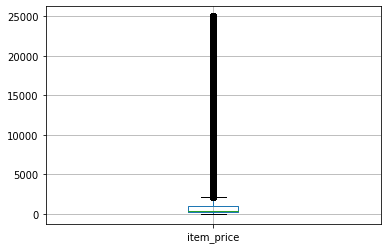

In [18]:
df[["item_price"]].boxplot()

<AxesSubplot:>

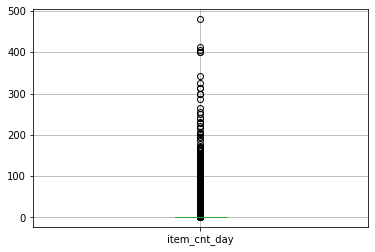

In [19]:
df[["item_cnt_day"]].boxplot()

# Aggregate Data at the Month Level

In [20]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),0,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,0,Музыка - Винил,"Москва ТРК ""Атриум"""
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,0,Музыка - Винил,"Москва ТРК ""Атриум"""
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),0,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
5,2013-01-10,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,0,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""


In [21]:
month_df = df.groupby(by=["date_block_num", "shop_id", "item_id"], as_index=False).agg(
    item_price=("item_price", "mean"),
    item_cnt_month=("item_cnt_day", "sum"),
    item_name=("item_name", "first"),
    item_category_id=("item_category_id", "first"),
    item_category_name=("item_category_name", "first"),
    shop_name=("shop_name", "first")
)

In [22]:
month_df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_month,item_name,item_category_id,item_category_name,shop_name
0,0,0,32,221.0,6.0,1+1,0,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
1,0,0,33,347.0,3.0,1+1 (BD),0,Кино - Blu-Ray,"!Якутск Орджоникидзе, 56 фран"
2,0,0,35,247.0,1.0,10 ЛЕТ СПУСТЯ,0,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
3,0,0,43,221.0,1.0,100 МИЛЛИОНОВ ЕВРО,0,Кино - DVD,"!Якутск Орджоникидзе, 56 фран"
4,0,0,51,128.5,2.0,100 лучших произведений классики (mp3-CD) (Dig...,0,Музыка - MP3,"!Якутск Орджоникидзе, 56 фран"


# Fill Missing Data

# Visualize

### Shop

In [23]:
shop_df = month_df.query("shop_id == 5")

<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_month'>

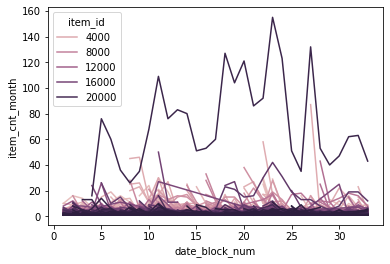

In [24]:
sns.lineplot(data=shop_df, x="date_block_num", y='item_cnt_month', hue='item_id')

In [25]:
shop_item_df = month_df.query("shop_id == 5 and item_id == 1000")

<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_month'>

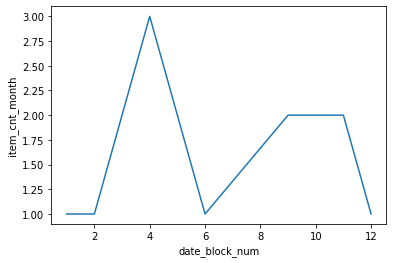

In [26]:
sns.lineplot(data=shop_item_df, x="date_block_num", y="item_cnt_month")

# Autocorrelation / Month Level

### ACF

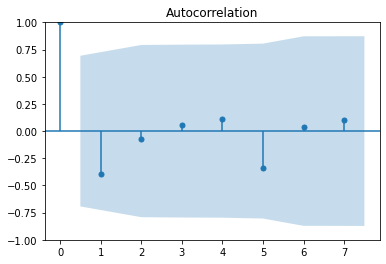

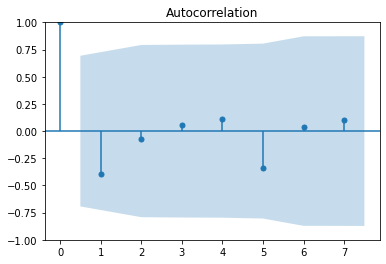

In [27]:
plot_acf(shop_item_df["item_cnt_month"])

### PACF

/home/iusztin/anaconda3/envs/aclabs/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


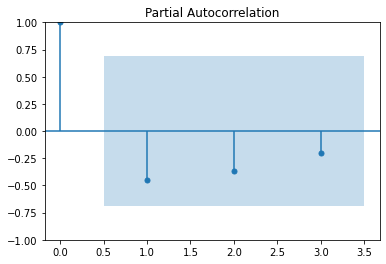

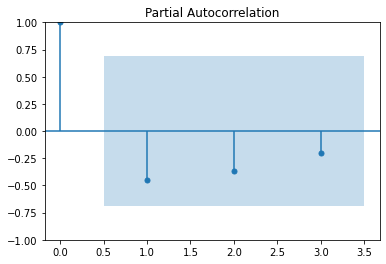

In [28]:
plot_pacf(shop_item_df["item_cnt_month"], lags=3)

# Autocorrelation / Day Level

In [29]:
shop_item_df = df.query("shop_id == 5 and item_id == 1000")

In [30]:
shop_item_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
164335,2013-02-23,1,5,1000,99.0,1.0,"3D Action Puzzle ""Зомби"" Уборщик",1,Подарки - Развитие,"Вологда ТРЦ ""Мармелад"""
345342,2013-03-09,2,5,1000,99.0,1.0,"3D Action Puzzle ""Зомби"" Уборщик",2,Подарки - Развитие,"Вологда ТРЦ ""Мармелад"""
529737,2013-05-26,4,5,1000,99.0,1.0,"3D Action Puzzle ""Зомби"" Уборщик",4,Подарки - Развитие,"Вологда ТРЦ ""Мармелад"""
529738,2013-05-02,4,5,1000,99.0,1.0,"3D Action Puzzle ""Зомби"" Уборщик",4,Подарки - Развитие,"Вологда ТРЦ ""Мармелад"""
529746,2013-05-20,4,5,1000,99.0,1.0,"3D Action Puzzle ""Зомби"" Уборщик",4,Подарки - Развитие,"Вологда ТРЦ ""Мармелад"""


In [31]:
shop_item_df = shop_item_df.set_index(keys=["date"], drop=True)
shop_item_df = shop_item_df[["item_cnt_day"]]
shop_item_df.head()

,item_cnt_day
date,
2013-02-23,1.0
2013-03-09,1.0
2013-05-26,1.0
2013-05-02,1.0
2013-05-20,1.0


In [32]:
shop_item_df.resample("D").mean().fillna(0)

,item_cnt_day
date,
2013-02-23,1.0
2013-02-24,0.0
2013-02-25,0.0
2013-02-26,0.0
2013-02-27,0.0
...,...
2014-01-08,0.0
2014-01-09,0.0
2014-01-10,0.0


In [33]:
shop_item_df = shop_item_df.resample("D").mean().fillna(0)

In [34]:
shop_item_df.index

DatetimeIndex(['2013-02-23', '2013-02-24', '2013-02-25', '2013-02-26',
               '2013-02-27', '2013-02-28', '2013-03-01', '2013-03-02',
               '2013-03-03', '2013-03-04',
               ...
               '2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
               '2014-01-11', '2014-01-12'],
              dtype='datetime64[ns]', name='date', length=324, freq='D')

### ACF

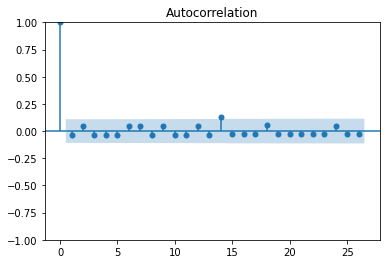

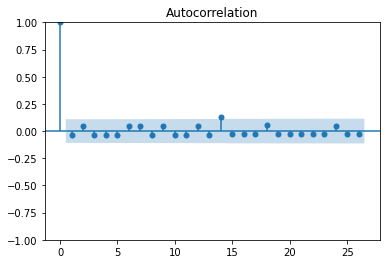

In [35]:
plot_acf(shop_item_df["item_cnt_day"])

### PACF

plot_pacf(shop_item_df["item_cnt_day"])

# Feature Engineering

### Is New Item (in the entire company)

### Is New Item (for every specific shop)

### Average Category Sales (at the company level)

### Average Category Sales (at the shop level)

### Item Sales Percentage Change

### Time Features (holidays, business days, month)

## Lagged Features

# Correlation Matrix

# Categorical Variables

# Split the Data

# Scale the Data

# Baseline Model

# Metrics